# Mesh composition

Here we show the basics of mesh composition using `sigmaepsilon.mesh`. To see the details of the commands and their parameters, see the API Reference.

## A minimal example

At the minimum, you need points and topology to describe a mesh.

In [1]:
import numpy as np

coords = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
], dtype=float)

topology = np.array([
    [0, 1, 2],
    [0, 2, 3],
], dtype=int)

Then you define a data object for the points

In [2]:
from sigmaepsilon.mesh import PointData

pd = PointData(coords=coords)

and one for the cells. For now we go with 3-noded triangles:

In [3]:
from sigmaepsilon.mesh.cells import T3 as CellData

cd = CellData(topo=topology)

If you have data objects for both points and cells, you can define a mesh.

In [4]:
from sigmaepsilon.mesh import PolyData

mesh = PolyData(pd, cd)

Make a plot to see what we got (more about plotting in a subsequent chapter)

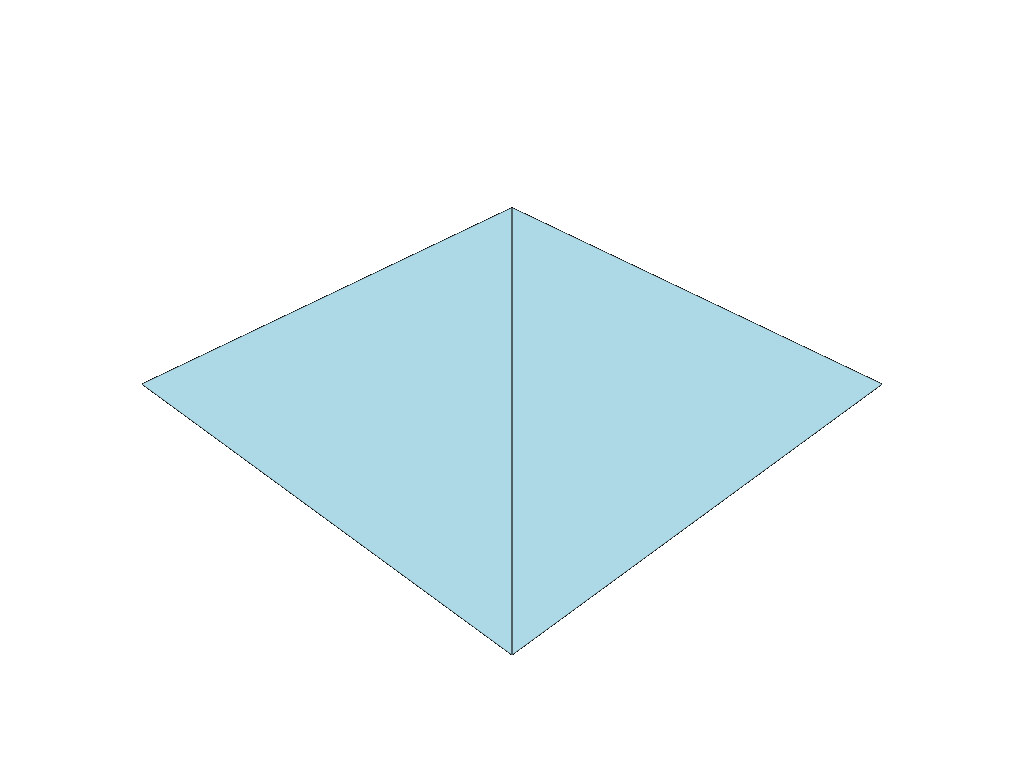

In [5]:
mesh.plot(notebook=True, jupyter_backend="static", theme="document")

## Joining and splitting meshes

One of the strong sides of the library is the composition of complex meshes. The following block shows how to define a mesh consisting of different types of cells, all referencing the same point data:

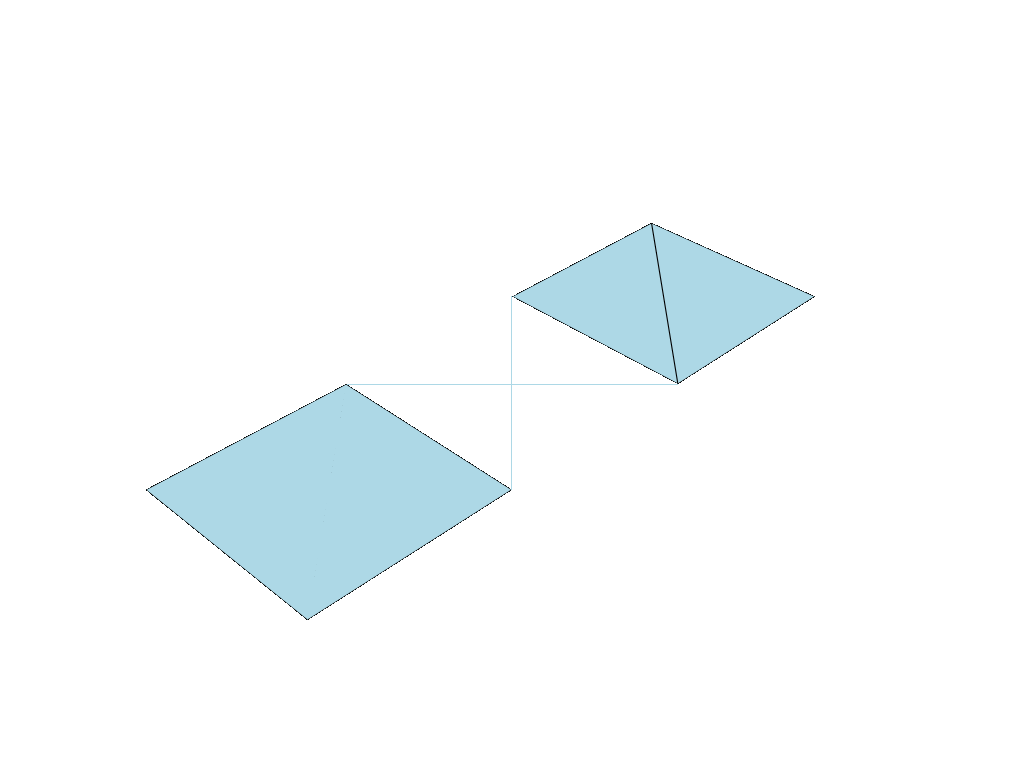

In [6]:
from sigmaepsilon.mesh import PointData, PolyData
from sigmaepsilon.mesh.cells import T3, Q4, L2
import numpy as np

coords = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [2, 0, 0],
    [3, 0, 0],
    [3, 1, 0],
    [2, 1, 0],
], dtype=float)

topology_T3 = np.array([
    [0, 1, 2],
    [0, 2, 3],
], dtype=int)

topology_Q4 = np.array([
    [4, 5, 6, 7],
], dtype=int)

topology_L2 = np.array([
    [1, 7],
    [2, 4]
], dtype=int)

pd = PointData(coords=coords)
cd_T3 = T3(topo=topology_T3)
cd_Q4 = Q4(topo=topology_Q4)
cd_L2 = L2(topo=topology_L2)

mesh = PolyData(pd)
mesh["triangles"] = PolyData(cd_T3)
mesh["quads"] = PolyData(cd_Q4)
mesh["lines"] = PolyData(cd_L2)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")

A `sigmaepsilon.mesh` object can consist of block each having their own point data:

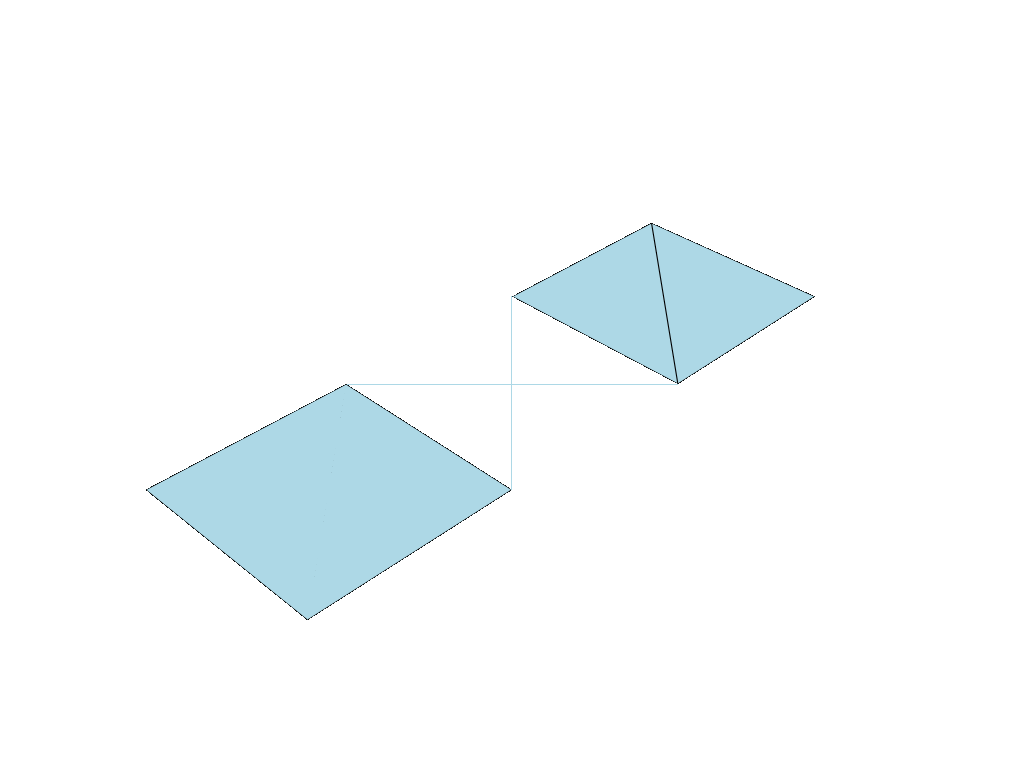

In [7]:
from sigmaepsilon.mesh import PointData, PolyData
from sigmaepsilon.mesh.cells import T3, Q4, L2
import numpy as np

coords_T3 = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
], dtype=float)

topology_T3 = np.array([
    [0, 1, 2],
    [0, 2, 3],
], dtype=int)

coords_Q4 = np.array([
    [2, 0, 0],
    [3, 0, 0],
    [3, 1, 0],
    [2, 1, 0],
], dtype=float)

topology_Q4 = np.array([
    [0, 1, 2, 3],
], dtype=int)

coords_L2 = np.array([
    [1, 0, 0],
    [2, 1, 0],
    [1, 1, 0],
    [2, 0, 0],
], dtype=float)

topology_L2 = np.array([
    [0, 1],
    [2, 3]
], dtype=int)

pd_T3 = PointData(coords=coords_T3)
cd_T3 = T3(topo=topology_T3)

pd_Q4 = PointData(coords=coords_Q4)
cd_Q4 = Q4(topo=topology_Q4)

pd_L2 = PointData(coords=coords_L2)
cd_L2 = L2(topo=topology_L2)

mesh = PolyData()
mesh["triangles"] = PolyData(pd_T3, cd_T3)
mesh["quads"] = PolyData(pd_Q4, cd_Q4)
mesh["lines"] = PolyData(pd_L2, cd_L2)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")

If you want to merge all the different point clouds into one, you can use the ``to_standard_form`` function of the root object. To see the effect, lets print out the topology of the mesh prior and after the operation:

In [8]:
mesh.topology()

<Array [[0, 1, 2], [0, 2, 3], ..., [0, 1], [2, 3]] type='5 * var * int32'>

In [9]:
mesh.to_standard_form()

PolyData({'triangles': PolyData({}), 'quads': PolyData({}), 'lines': PolyData({})})

In [10]:
mesh.topology()

<Array [[0, 1, 2], [0, 2, 3], ..., [8, ...], [10, 11]] type='5 * var * int32'>

In [11]:
mesh["triangles"].cd

<Array [{_nodes: [0, ...], _id: 0}, {...}] type='2 * {_nodes: 3 * int32, _i...'>

A mesh can also be splitted using the `detach` method of a block. The option `nummrg=True` causes a zero based continuous node numbering of the detached mesh.

In [12]:
mesh["quads"].detach(nummrg=True)

PolyData({})

## Nested layouts

A mesh can have an arbitrary number of nested levels. In the next block the same mesh is defined twice. The two definitions differ in their layout, but are the same in terms of points, topology and related data.

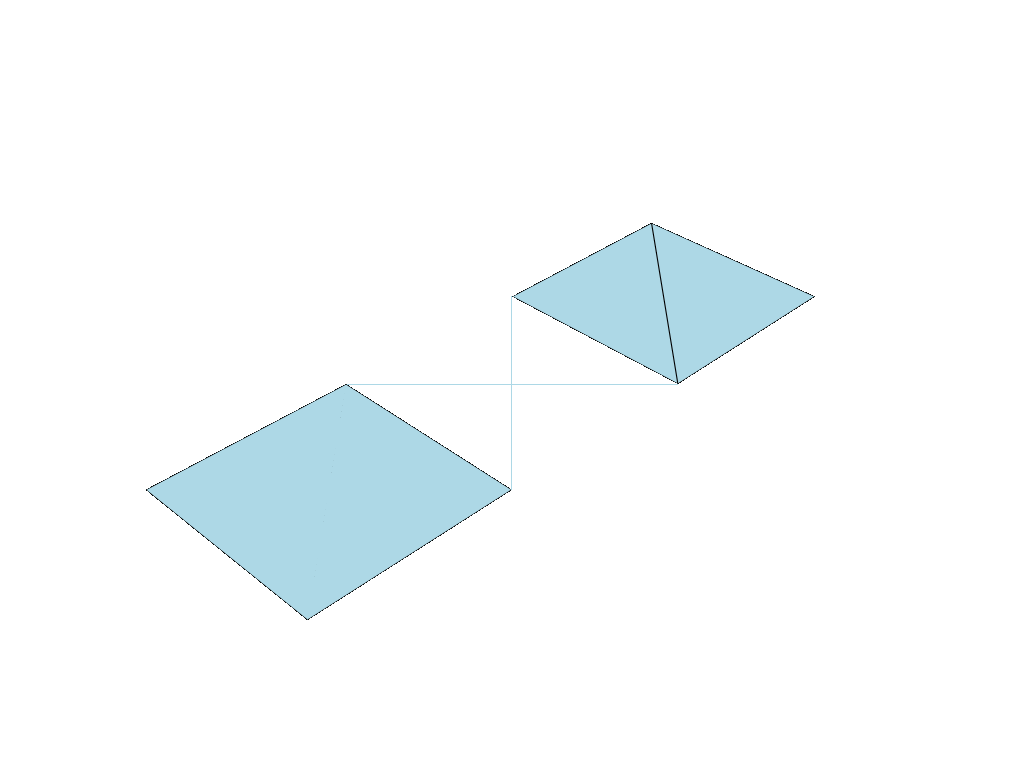

In [13]:
mesh = PolyData()
mesh["triangles"] = PolyData(pd_T3, cd_T3)
mesh["quads"] = PolyData(pd_Q4, cd_Q4)
mesh["lines"] = PolyData(pd_L2, cd_L2)

mesh = PolyData()
mesh["2d", "triangles"] = PolyData(pd_T3, cd_T3)
mesh["2d", "quads"] = PolyData(pd_Q4, cd_Q4)
mesh["lines"] = PolyData(pd_L2, cd_L2)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")

Everything below a certain level behaves like a `PolyData` instance:

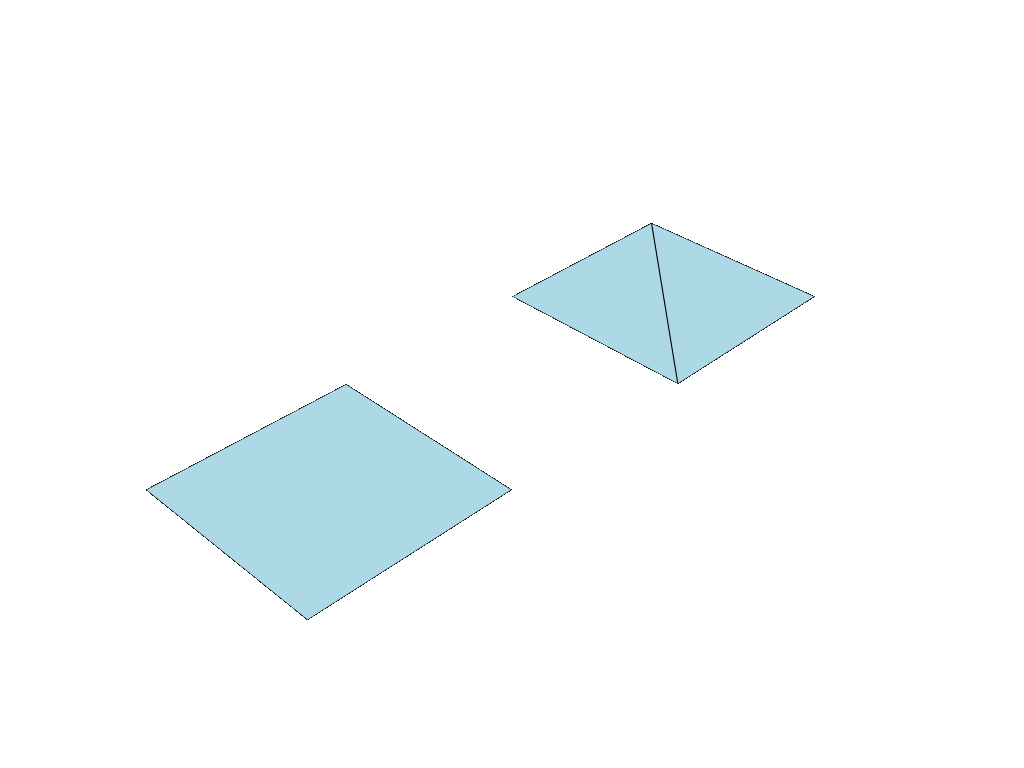

In [14]:
mesh["2d"].plot(notebook=True, jupyter_backend="static", theme="document")